## PROGRAM 06

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def generate_data():
    X = np.linspace(0, 10, 100)
    y = np.sin(X) + np.random.normal(0, 0.1, X.shape[0])
    return X.reshape(-1, 1), y

In [10]:
def add_bias(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

In [12]:
def compute_weights(X, x0, tau):
    m = X.shape[0]
    W = np.eye(m)
    for i in range(m):
        xi = X[i]
        W[i, i] = np.exp(-np.sum((xi - x0) ** 2) / (2 * tau ** 2))
    return W

In [14]:
def lwlr_predict(X, y, x0, tau):
    X_bias = add_bias(X)
    x0_bias = add_bias(x0.reshape(1, -1))
    W = compute_weights(X, x0, tau)
    theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ (X_bias.T @ W @ y)
    return x0_bias @ theta

In [20]:
def plot_lwlr(X, y, tau):
    x_query = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_pred = np.array([lwlr_predict(X, y, x0, tau) for x0 in x_query])
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label="Training Data", color='blue', alpha=0.6)
    plt.plot(x_query, y_pred, label=f'LWLR Prediction (tau={tau})', color='red')
    plt.title("Locally Weighted Regression")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

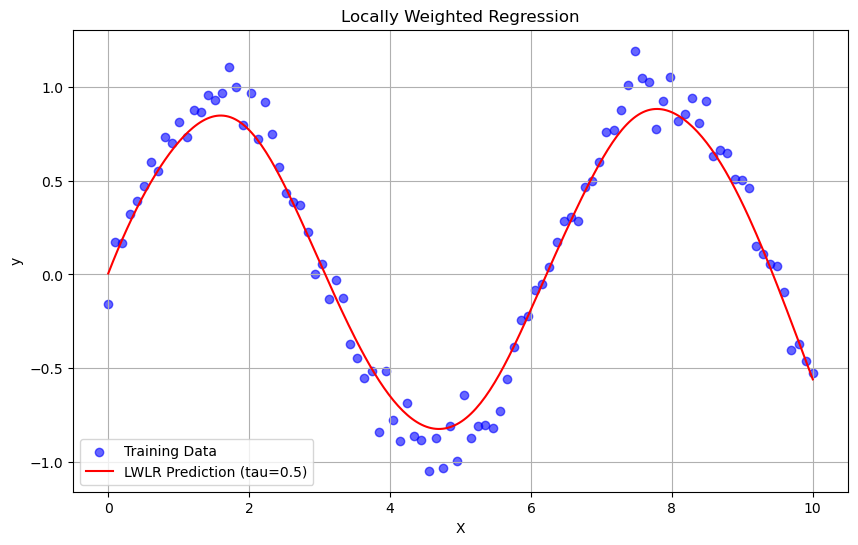

In [22]:
X, y = generate_data()
plot_lwlr(X, y, tau=0.5)